We have done several kinds of DEMs:

- All-instrument DEMs (all - either AIA+NuSTAR, or AIA+NuSTAR+XRT, depending on XRT availability)
- no-XRT DEMs (for XRT intervals)
- AIA + XRT DEMs (for XRT intervals)
- only AIA DEMs (all)

We want to compare the relative effects of each combination of instruments. As such, we would like to compare:

- AIA only vs. AIA+NuSTAR DEMs (for ALL cases)
- AIA only vs. AIA+NuSTAR vs. AIA+NuSTAR+XRT vs. AIA+XRT (for XRT-having DEMs)

We are just going to do this with the full temperature range (logT = 5.6-7.2). 

Parameters of interest to compare are:

- Emission Measure >5 MK, >7 MK, >10 MK

In [1]:
path_to_dodem = '/Users/jmdunca2/do-dem/'
from sys import path as sys_path
sys_path.append(path_to_dodem+'/dodem/')

import visualize_dem_results as viz
import all_nu_analysis as ana

import pickle
import os

import numpy as np

import matplotlib
from matplotlib import pyplot as plt

colors_list = np.concatenate((matplotlib.cm.tab10(range(10)), matplotlib.cm.Dark2(range(10))), axis=0)

In [2]:
# #FOR WHEN WE REMOVE FILES

# os.remove(ff)

In [3]:
with open('./reference_files/result_file_dict.pickle', 'rb') as f:
    dictz = pickle.load(f)



nones = []
somes = []

xrts = []
nxrts = []
    
for k in dictz.keys():
    print(k)
    if k != 'all regions':
        any, xrt = ana.print_stats(dictz[k])
    
        if not any:
            nones.append(k)
        else:
            somes.append(k)
            if not xrt:
                nxrts.append(k)
            else:
                xrts.append(k)


print('No-result regions: ', nones)
print('')
print('Result regions: ', somes)
print('')

print('XRT regions: ', xrts)
print('')
print('No-XRT regions: ', nxrts)
print('')

all regions
01-sep-15 region_0
01-sep-15
Flare-time only-AIA DEMS:  39
Quiet-time only-AIA DEMS:  8
Flare-time AIA+XRT DEMS:  0
Quiet-time AIA+XRT DEMS:  0
Flare-time AIA+NuSTAR DEMS:  0
Quiet-time AIA+NuSTAR DEMS:  0
Flare-time All-instrument DEMS:  39
Quiet-time All-instrument DEMS:  8

02-sep-15 region_0
02-sep-15
Flare-time only-AIA DEMS:  15
Quiet-time only-AIA DEMS:  6
Flare-time AIA+XRT DEMS:  0
Quiet-time AIA+XRT DEMS:  0
Flare-time AIA+NuSTAR DEMS:  0
Quiet-time AIA+NuSTAR DEMS:  0
Flare-time All-instrument DEMS:  15
Quiet-time All-instrument DEMS:  6

02-sep-15 region_1
02-sep-15
Flare-time only-AIA DEMS:  35
Quiet-time only-AIA DEMS:  4
Flare-time AIA+XRT DEMS:  0
Quiet-time AIA+XRT DEMS:  0
Flare-time AIA+NuSTAR DEMS:  0
Quiet-time AIA+NuSTAR DEMS:  0
Flare-time All-instrument DEMS:  35
Quiet-time All-instrument DEMS:  4

19-feb-16 region_0
19-feb-16
Flare-time only-AIA DEMS:  15
Quiet-time only-AIA DEMS:  10
Flare-time AIA+XRT DEMS:  0
Quiet-time AIA+XRT DEMS:  0
Flare-tim

/Users/jmdunca2/do-dem/initial_dem_22apr16_2/

/Users/jmdunca2/do-dem/initial_dem_11sep17/

/Users/jmdunca2/do-dem/initial_dem_12sep17/region_0/

/Users/jmdunca2/do-dem/initial_dem_12sep17/region_1/

/Users/jmdunca2/do-dem/initial_dem_13sep17/region_0/

/Users/jmdunca2/do-dem/initial_dem_13sep17/region_1/

/Users/jmdunca2/do-dem/initial_dem_29may18_1/

/Users/jmdunca2/do-dem/initial_dem_12apr19/

/Users/jmdunca2/do-dem/initial_dem_13apr19/

/Users/jmdunca2/do-dem/initial_dem_29jan20/

/Users/jmdunca2/do-dem/initial_dem_29apr21/

/Users/jmdunca2/do-dem/initial_dem_3may21_2/

/Users/jmdunca2/do-dem/initial_dem_30jul21_1/east/

/Users/jmdunca2/do-dem/initial_dem_30jul21_1/west/

/Users/jmdunca2/do-dem/initial_dem_30jul21_2/



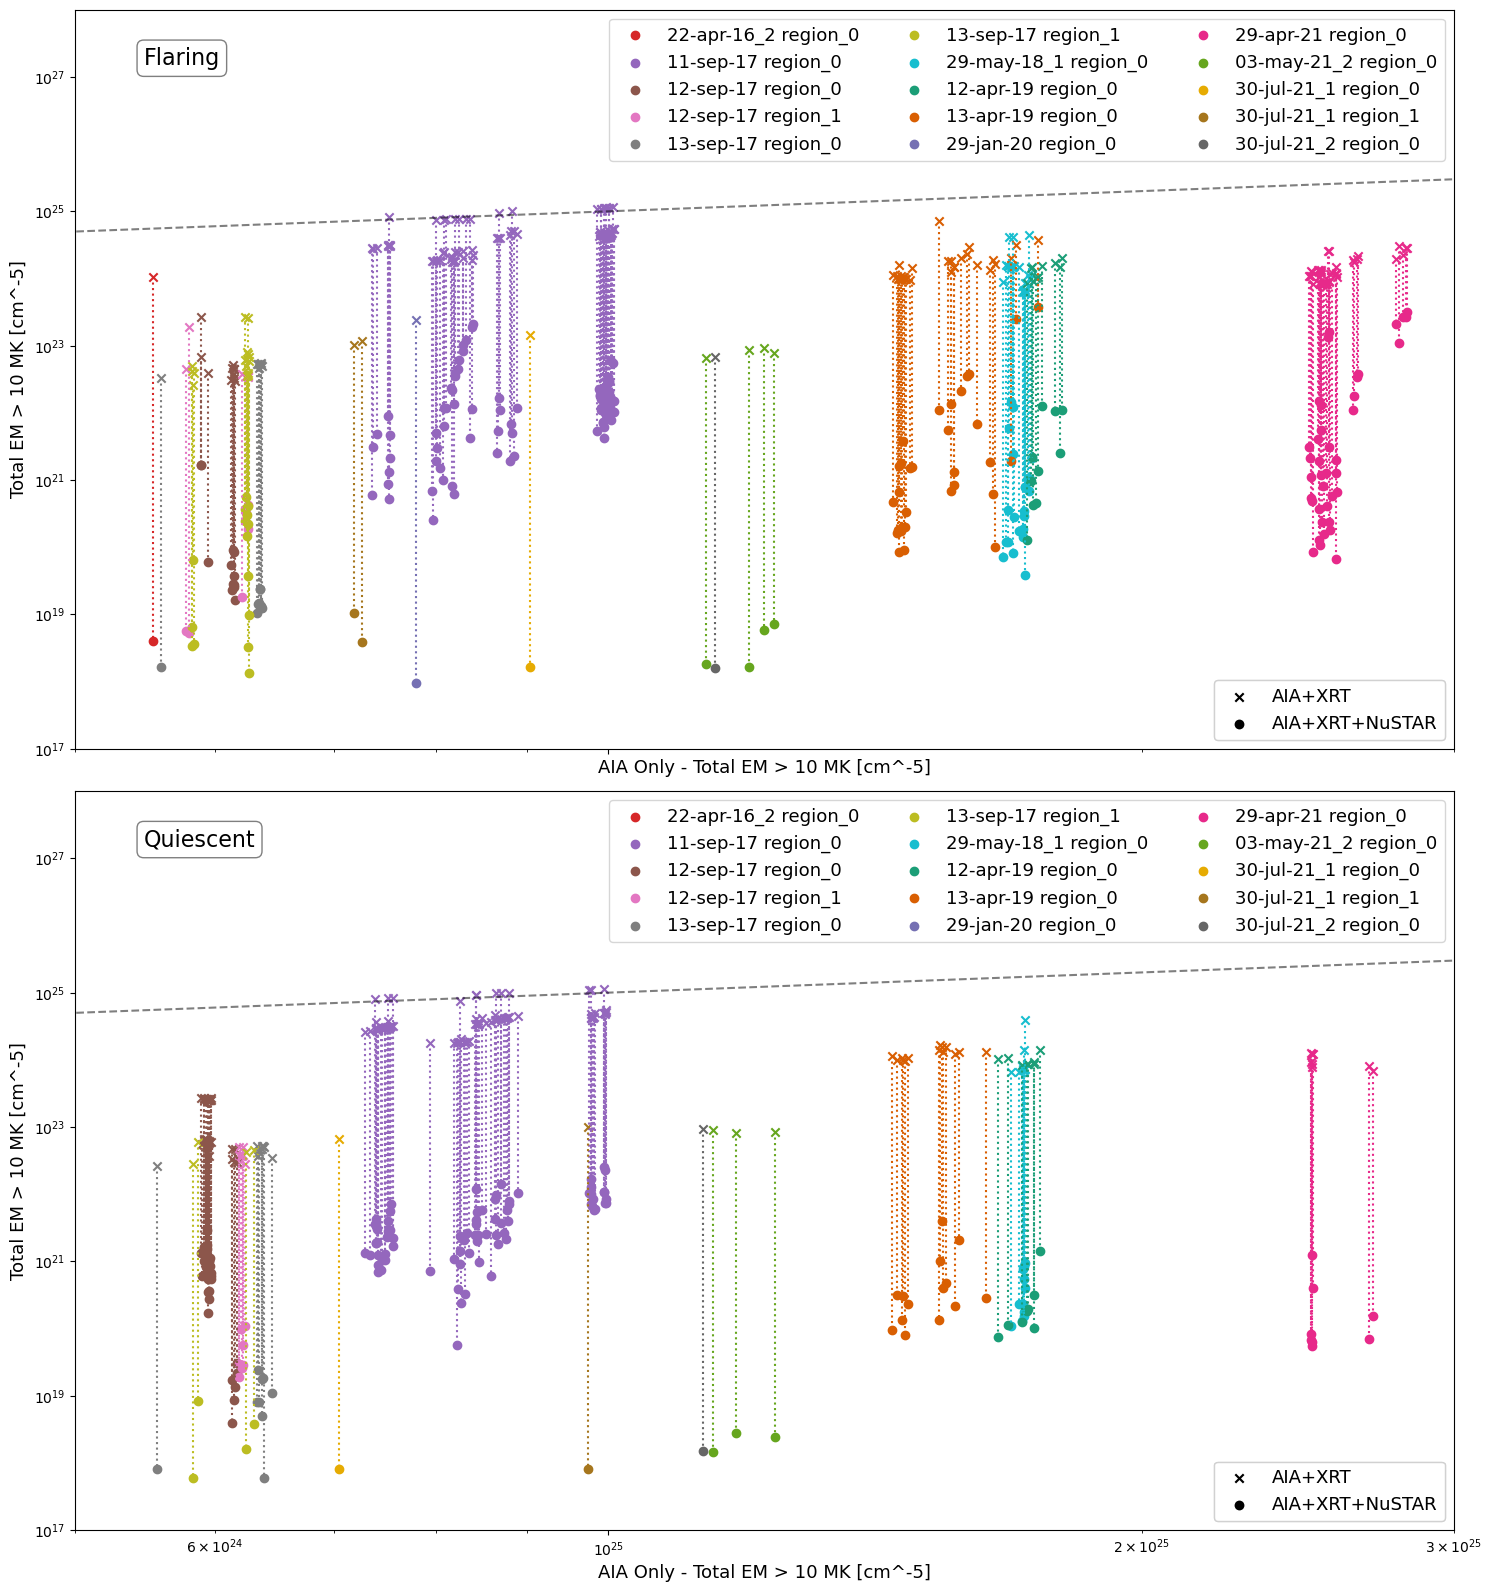

In [4]:
#WE NEED A FUNCTION WHICH TAKES A LIST OF TIMES FOR A GIVEN KEY AND FETCHES ALL THE DEM RESULTS OF A GIVEN TYPE.

def get_res_4_times(times, dir_, namesearchstring, withparams=False, returndatas=False):

    import glob

    files_ = []
    for tt in times:
        timestring = viz.make_timestring(tt)
        if withparams:
            files = glob.glob(dir_+'/'+timestring+'/'+'*5.6_7.2*'+namesearchstring+'*withparams.pickle')[0]
        else:
            #print(dir_+'/'+timestring+'/'+'*5.6_7.2*'+namesearchstring+'*.pickle')
            fs = glob.glob(dir_+'/'+timestring+'/'+'*5.6_7.2*'+namesearchstring+'*.pickle')
            files = [f for f in fs if 'withparams' not in f]

        files_.append(files)


    #print(files_)

    if not returndatas:
        return files_
    else:
        datas = [viz.load_DEM(f) for f in files_]
        return datas


#get_res_4_times(times, dir_, namesearchstring, withparams=False)




baddies=0


with open('all_targets.pickle', 'rb') as f:
    all_targets = pickle.load(f)

import pathlib
from matplotlib import pyplot as plt


fig, axes = plt.subplots(2, 1, figsize=(15,16), tight_layout = {'pad': 1}, sharex=True)


num=3
for xr in xrts:
    dictt = dictz[xr]
    #print(dictt.keys())
    # aiaxrt = dict['quiet files aiaxrt']
    # print(aiaxrt)
    # print('')


    ARDict = all_targets[xr.split(' ')[0]]
    #print(ARDict)
    working_dir = ARDict['working_dir']
    method = ARDict['method']
    #handling my stupid directory naming irregularity
    if method == 'double':
        if ARDict['gauss_stats'][0][0] == 'EW':
            if xr.split(' ')[1] == 'region_0':
                thepath = working_dir+'east/'
            else:
                thepath = working_dir+'west/'

        if ARDict['gauss_stats'][0][0] == 'SN':
            if xr.split(' ')[1] == 'region_0':
                thepath = working_dir+'south/'
            else:
                thepath = working_dir+'north/'
    else:
        #the sane normal case
        thepath = working_dir+xr.split(' ')[1]+'/'

    save_path = pathlib.Path(thepath) 
    if not save_path.exists():
        thepath = working_dir


    print(thepath)

    rtds = True

    qfilelists = []
    qfilelists.append(get_res_4_times(dictt['quiet xrt times '], thepath, 'onlyaia', withparams=True, returndatas=rtds))
    qfilelists.append(get_res_4_times(dictt['quiet xrt times '], thepath, 'aiaxrt', withparams=True, returndatas=rtds))
    qfilelists.append(get_res_4_times(dictt['quiet xrt times '], thepath, xr.split(' ')[0]+'_MC', withparams=True, returndatas=rtds))
    #print(filelists)
    #for f in qfilelists:
        #print(len(f))

    ffilelists = []
    ffilelists.append(get_res_4_times(dictt['flare xrt times '], thepath, 'onlyaia', withparams=True, returndatas=rtds))
    ffilelists.append(get_res_4_times(dictt['flare xrt times '], thepath, 'aiaxrt', withparams=True, returndatas=rtds))
    ffilelists.append(get_res_4_times(dictt['flare xrt times '], thepath, xr.split(' ')[0]+'_MC', withparams=True, returndatas=rtds))
    #print(filelists)
    #for f in ffilelists:
    #    print(len(f))


    #Filelists is a list with three entries. Each entry is a list of dictionaries. If the length of the list is 1, 
        

    above10z = np.zeros((len(ffilelists[0]), 3))
    #print(above10z)
    for i in range(0, len(ffilelists[0])):
        for j in range(0,3):
            above10z[i,j] = ffilelists[j][i][0]['above_10MK'][0]


    above10zq = np.zeros((len(qfilelists[0]), 3))
    #print(above10z)
    for i in range(0, len(qfilelists[0])):
        for j in range(0,3):
            above10zq[i,j] = qfilelists[j][i][0]['above_10MK'][0]


    #Examining the cases where aia-xrt involves MORE hot material than AIA alone – all are times with only Al-poly.
    # for i in range(0, len(ffilelists[0])):
    #     if above10z[i, 0] < above10z[i, 1]:
    #         print(above10z[i, :])
    #         print(i)
    #         print(ffilelists[1][i][0]['chanax'])
    #         print(dictt['flare xrt times '][i])
    #         baddies+=1


    #print(above10z)
    print('')
        
    
    axes[0].scatter(above10z[:,0], above10z[:,1], marker='x', color=colors_list[num])
    axes[0].scatter(above10z[:,0], above10z[:,2], marker='o', color=colors_list[num], label=xr)
    for i in range(0, len(ffilelists[0])):
        axes[0].plot([above10z[i,0], above10z[i,0]], [above10z[i,1], above10z[i,2]], linestyle='dotted', color=colors_list[num])
    


    axes[1].scatter(above10zq[:,0], above10zq[:,1], marker='x', color=colors_list[num])
    axes[1].scatter(above10zq[:,0], above10zq[:,2], marker='o', color=colors_list[num], label=xr)
    for i in range(0, len(qfilelists[0])):
        axes[1].plot([above10zq[i,0], above10zq[i,0]], [above10zq[i,1], above10zq[i,2]], linestyle='dotted', color=colors_list[num])
    

    num+=1

#print('bad Ones: ', baddies)

for ax in axes:
    ax.plot([1e18, 3e25], [1e18, 3e25], linestyle='dashed', color='black', alpha=0.5)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylim([1e17, 1e28])
    ax.set_xlim([5e24, 3e25])
    legend1 = ax.legend(ncol=3, fontsize=13)
    ax.set_ylabel('Total EM > 10 MK [cm^-5]', fontsize=13)
    ax.set_xlabel('AIA Only - Total EM > 10 MK [cm^-5]', fontsize=13)


    lab1 = ax.scatter([0,1],[0,1], marker='x', color='black', label='AIA+XRT')
    lab2 = ax.scatter([0,1],[0,1], marker='o', color='black', label='AIA+XRT+NuSTAR')

    legend2 = ax.legend([lab1, lab2], ['AIA+XRT', 'AIA+XRT+NuSTAR'], loc=4, fontsize=13)
    ax.add_artist(legend1)
    ax.add_artist(legend2)

props = dict(boxstyle='round', facecolor='white', alpha=0.5)
axes[0].text(0.05, 0.95, 'Flaring', transform=axes[0].transAxes, fontsize=16,
                            verticalalignment='top', bbox=props)
axes[1].text(0.05, 0.95, 'Quiescent', transform=axes[1].transAxes, fontsize=16,
                            verticalalignment='top', bbox=props)

plt.savefig('aia_xrt_nustar_comparison_by_flaring.png')

/Users/jmdunca2/do-dem/initial_dem_22apr16_2/
/Users/jmdunca2/do-dem/initial_dem_11sep17/
/Users/jmdunca2/do-dem/initial_dem_12sep17/region_0/
/Users/jmdunca2/do-dem/initial_dem_12sep17/region_1/
/Users/jmdunca2/do-dem/initial_dem_13sep17/region_0/
/Users/jmdunca2/do-dem/initial_dem_13sep17/region_1/
/Users/jmdunca2/do-dem/initial_dem_29may18_1/
/Users/jmdunca2/do-dem/initial_dem_12apr19/
/Users/jmdunca2/do-dem/initial_dem_13apr19/
/Users/jmdunca2/do-dem/initial_dem_29jan20/
/Users/jmdunca2/do-dem/initial_dem_29apr21/
/Users/jmdunca2/do-dem/initial_dem_3may21_2/
/Users/jmdunca2/do-dem/initial_dem_30jul21_1/east/
/Users/jmdunca2/do-dem/initial_dem_30jul21_1/west/
/Users/jmdunca2/do-dem/initial_dem_30jul21_2/


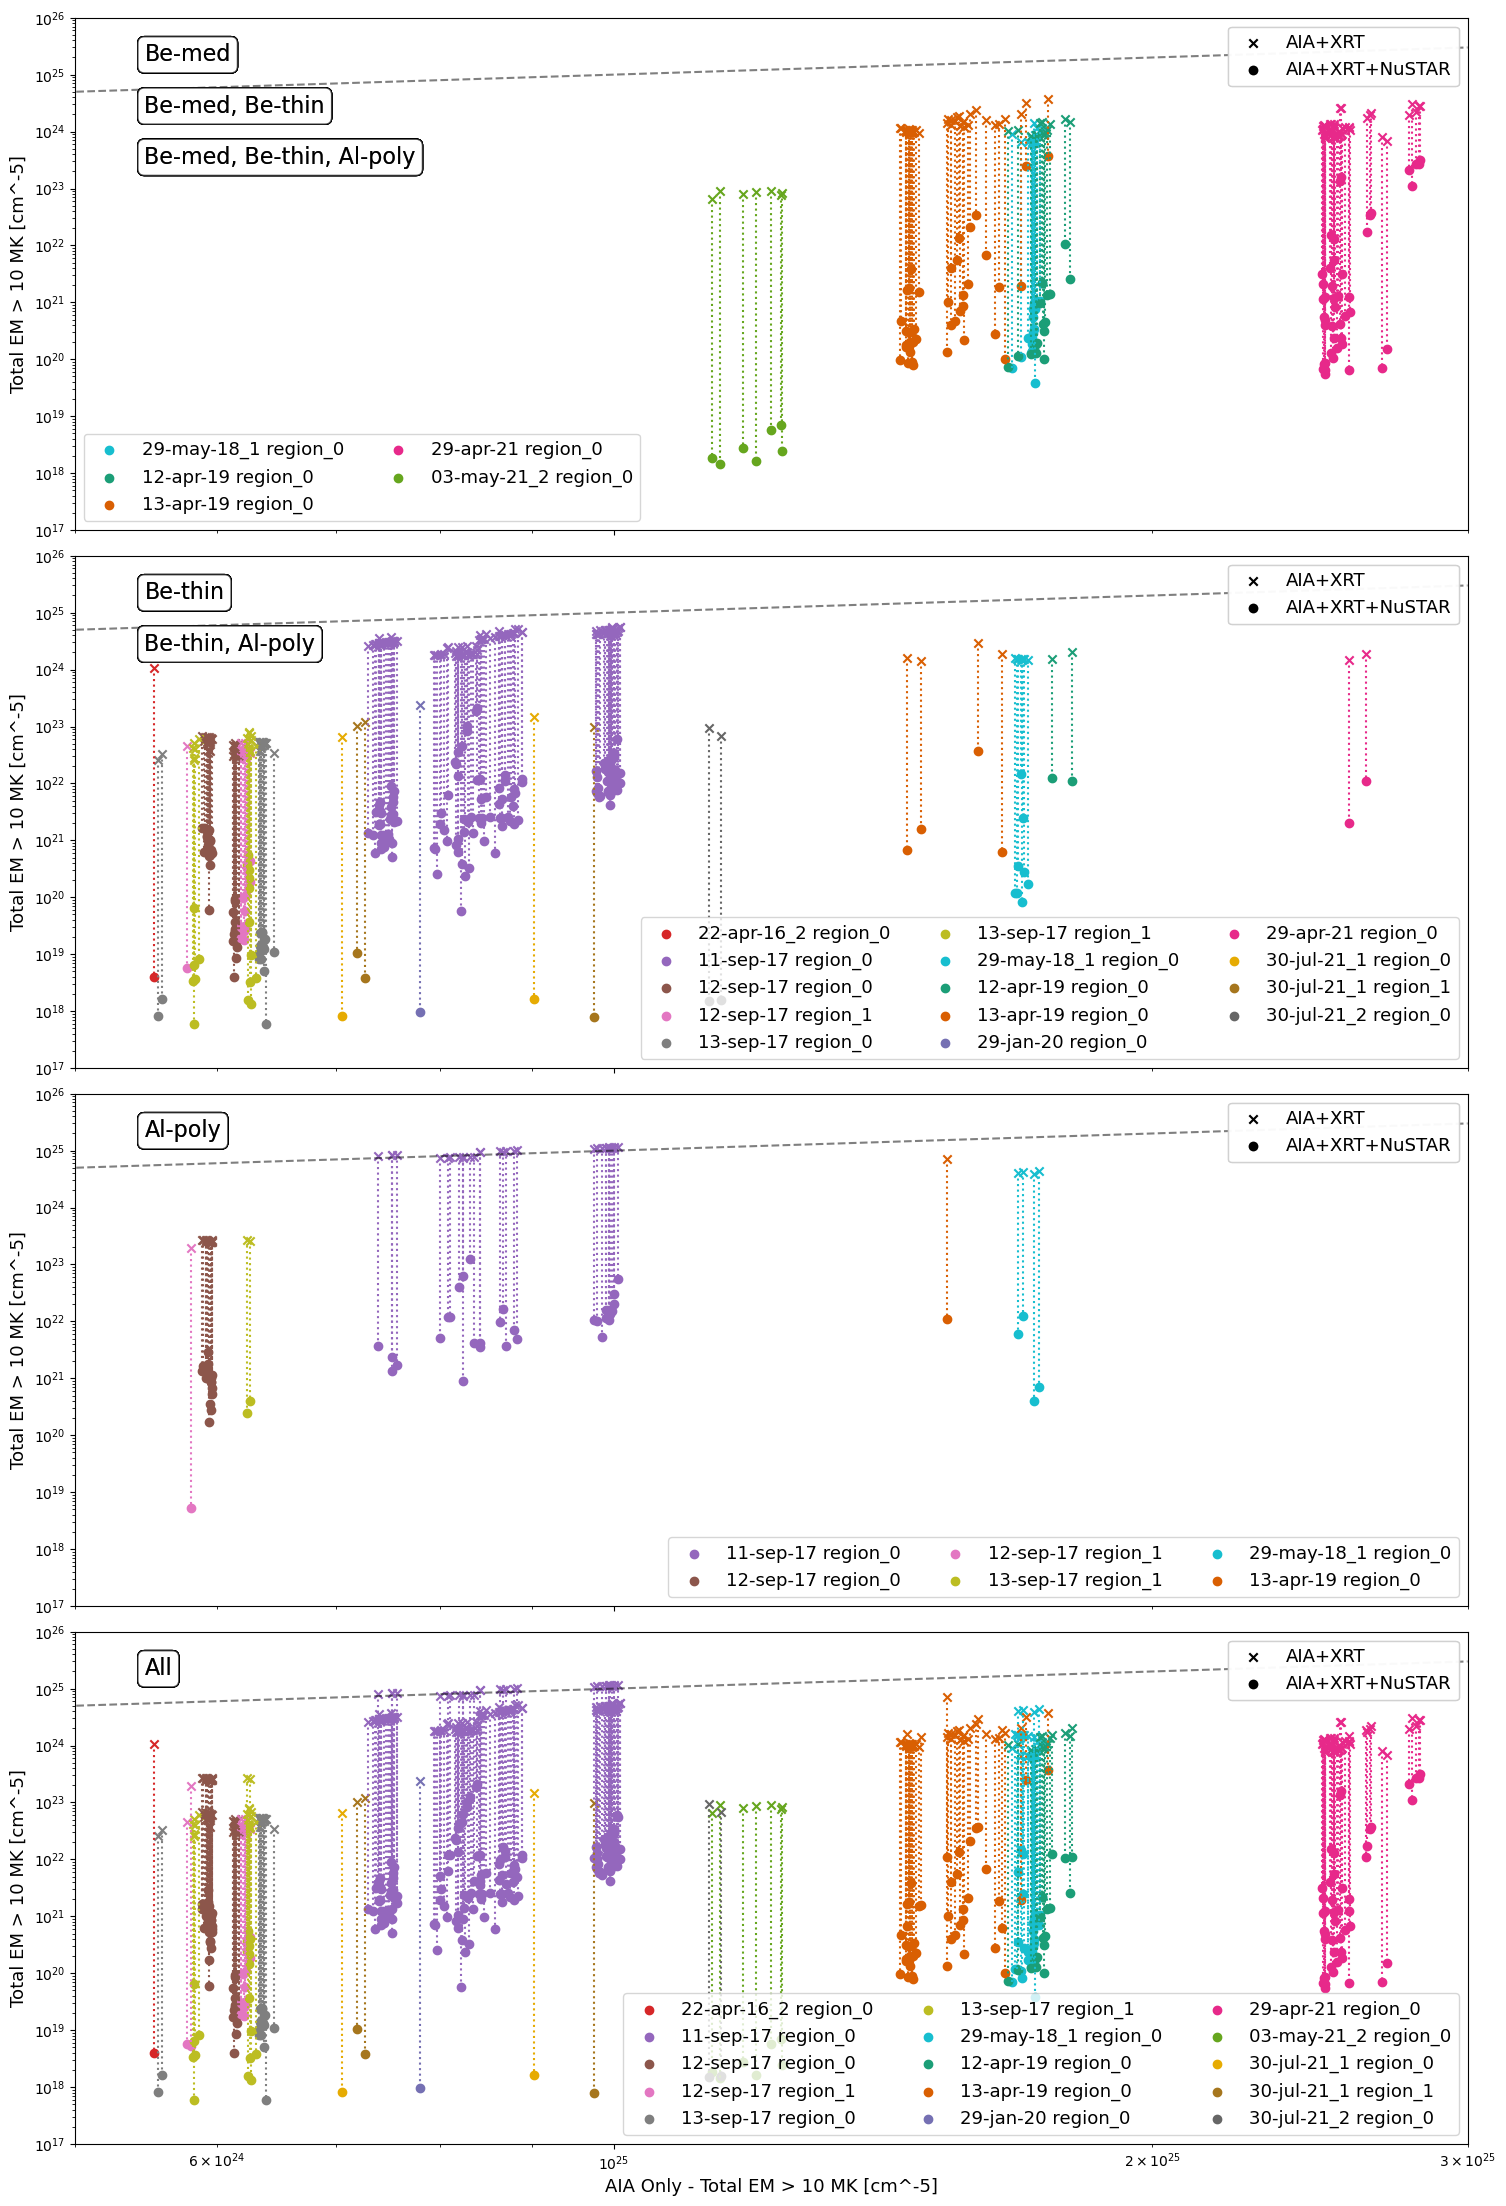

In [5]:

with open('all_targets.pickle', 'rb') as f:
    all_targets = pickle.load(f)

import pathlib
from matplotlib import pyplot as plt

fig, axes = plt.subplots(4, 1, figsize=(15,22), tight_layout = {'pad': 0.5}, sharex=True)


above10z_med_all = []
above10z_thin_all = []
above10z_poly_all = []
above10z_all = []



num=3
for xr in xrts:
    dictt = dictz[xr]
    #print(dictt.keys())
    # aiaxrt = dict['quiet files aiaxrt']
    # print(aiaxrt)
    # print('')


    ARDict = all_targets[xr.split(' ')[0]]
    #print(ARDict)
    working_dir = ARDict['working_dir']
    method = ARDict['method']
    #handling my stupid directory naming irregularity
    if method == 'double':
        if ARDict['gauss_stats'][0][0] == 'EW':
            if xr.split(' ')[1] == 'region_0':
                thepath = working_dir+'east/'
            else:
                thepath = working_dir+'west/'

        if ARDict['gauss_stats'][0][0] == 'SN':
            if xr.split(' ')[1] == 'region_0':
                thepath = working_dir+'south/'
            else:
                thepath = working_dir+'north/'
    else:
        #the sane normal case
        thepath = working_dir+xr.split(' ')[1]+'/'

    save_path = pathlib.Path(thepath) 
    if not save_path.exists():
        thepath = working_dir


    print(thepath)

    rtds = True

    filelists = []
    filelists.append(get_res_4_times(dictt['quiet xrt times '], thepath, 'onlyaia', withparams=True, returndatas=rtds))
    filelists.append(get_res_4_times(dictt['quiet xrt times '], thepath, 'aiaxrt', withparams=True, returndatas=rtds))
    filelists.append(get_res_4_times(dictt['quiet xrt times '], thepath, xr.split(' ')[0]+'_MC', withparams=True, returndatas=rtds))
    #print(filelists)
    #for f in filelists:
    #    print(len(f))

    #In this version, not separating by flare vs. quiet. 
    filelists[0].extend(get_res_4_times(dictt['flare xrt times '], thepath, 'onlyaia', withparams=True, returndatas=rtds))
    filelists[1].extend(get_res_4_times(dictt['flare xrt times '], thepath, 'aiaxrt', withparams=True, returndatas=rtds))
    filelists[2].extend(get_res_4_times(dictt['flare xrt times '], thepath, xr.split(' ')[0]+'_MC', withparams=True, returndatas=rtds))
    #print(filelists)
    #for f in filelists:
    #    print(len(f))


    #Filelists is a list with three entries. Each entry is a list of dictionaries. If the length of the list is 1, 
        

    above10z_med = []
    above10z_thin = []
    above10z_poly = []
    above10z = []
    
    for i in range(0, len(filelists[0])):
        if 'Be-med x2' in filelists[1][i][0]['chanax']:
            lilist=[]
            for j in range(0,3):
                lilist.append(filelists[j][i][0]['above_10MK'][0])
            above10z_med.append(lilist)
            above10z.append(lilist)
        elif 'Be-thin x2' in filelists[1][i][0]['chanax']:
            lilist=[]
            for j in range(0,3):
                lilist.append(filelists[j][i][0]['above_10MK'][0])
            above10z_thin.append(lilist)
            above10z.append(lilist)
        elif 'Al-poly x2' in filelists[1][i][0]['chanax']:
            lilist=[]
            for j in range(0,3):
                lilist.append(filelists[j][i][0]['above_10MK'][0])
            above10z_poly.append(lilist)
            above10z.append(lilist)


    rezarrs = [above10z_med, above10z_thin, above10z_poly, above10z]
    rtitles = [['Be-med', 'Be-med, Be-thin', 'Be-med, Be-thin, Al-poly'], ['Be-thin', 'Be-thin, Al-poly'] , ['Al-poly'], ['All']]
    for r in range(0, len(rezarrs)):
        if rezarrs[r]:
            rarar=np.array(rezarrs[r])
            axes[r].scatter(rarar[:,0], rarar[:,1], marker='x', color=colors_list[num])
            axes[r].scatter(rarar[:,0], rarar[:,2], marker='o', color=colors_list[num], label=xr)
            for i in range(0, rarar.shape[0]):
                axes[r].plot([rarar[i,0], rarar[i,0]], [rarar[i,1], rarar[i,2]], linestyle='dotted', color=colors_list[num])

        # place a text box in upper left in axes coords
        props = dict(boxstyle='round', facecolor='white', alpha=0.5)
        shift=0
        for lab in rtitles[r]:
            axes[r].text(0.05, 0.95-shift, lab, transform=axes[r].transAxes, fontsize=16,
                            verticalalignment='top', bbox=props)
            shift+=0.1

    
    num+=1



    above10z_med_all.extend(above10z_med)
    above10z_thin_all.extend(above10z_thin)
    above10z_poly_all.extend(above10z_poly)
    above10z_all.extend(above10z)


# #print('bad Ones: ', baddies)
first=0
for ax in axes:
    ax.plot([1e18, 3e25], [1e18, 3e25], linestyle='dashed', color='black', alpha=0.5)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylim([1e17, 1e26])
    ax.set_xlim([5e24, 3e25])
    if first==0:
        legend1 = ax.legend(ncol=2, loc=3, fontsize=13)
        first+=1
    else:
        legend1 = ax.legend(ncol=3, loc=4, fontsize=13)
    ax.set_ylabel('Total EM > 10 MK [cm^-5]', fontsize=13)

    
    lab1 = ax.scatter([0,1],[0,1], marker='x', color='black', label='AIA+XRT')
    lab2 = ax.scatter([0,1],[0,1], marker='o', color='black', label='AIA+XRT+NuSTAR')

    legend2 = ax.legend([lab1, lab2], ['AIA+XRT', 'AIA+XRT+NuSTAR'], loc=1, fontsize=13)
    ax.add_artist(legend1)
    ax.add_artist(legend2)
    
    
axes[3].set_xlabel('AIA Only - Total EM > 10 MK [cm^-5]', fontsize=13)



plt.savefig('aia_xrt_nustar_comparison_by_xrt_filter.png')

Text(0.5, 1.0, 'All')

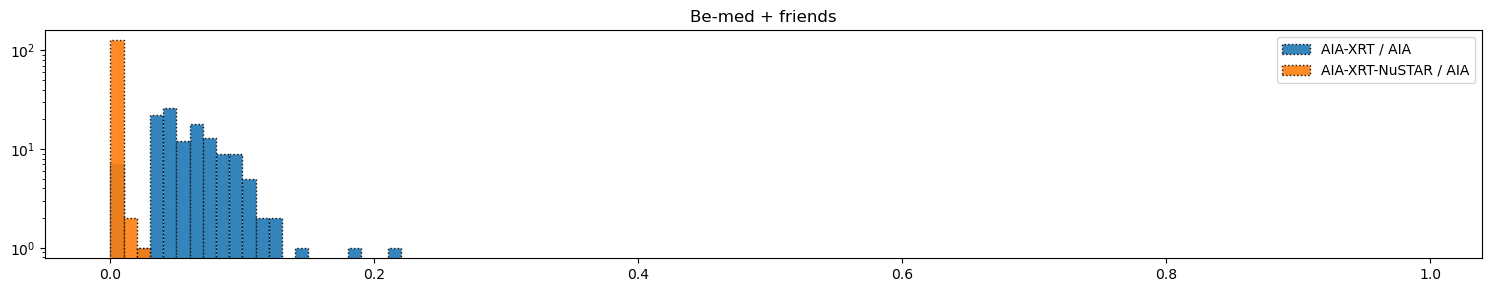

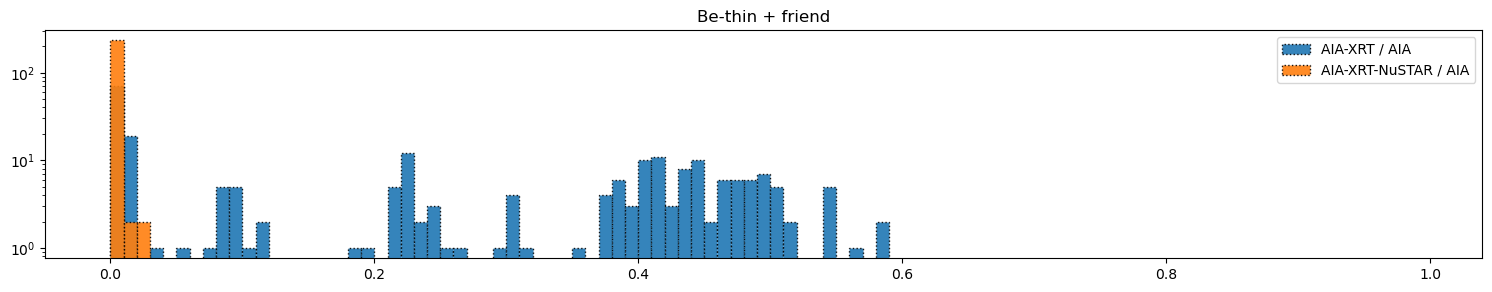

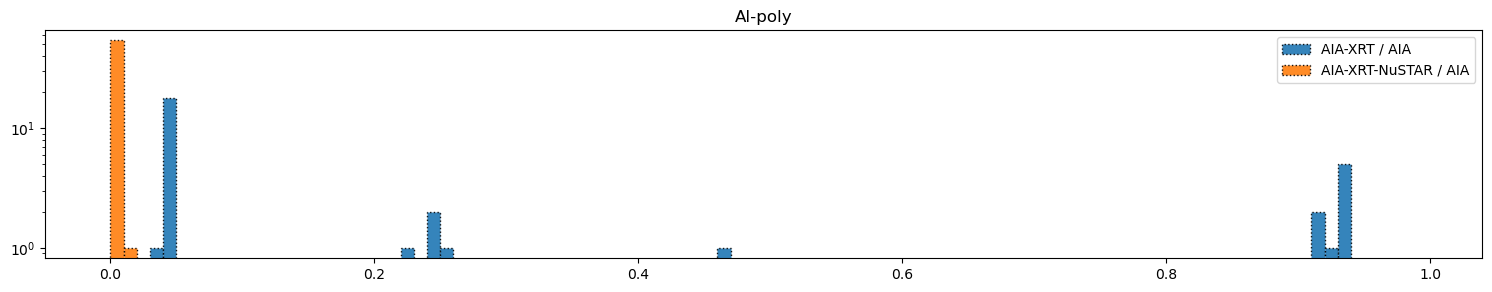

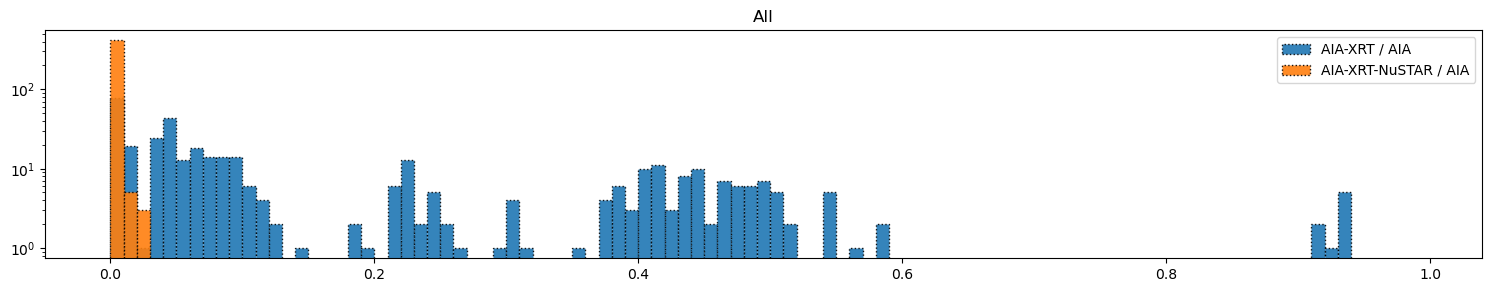

In [6]:


def ratioz(above10z_):

    return [a[1]/a[0] for a in above10z_], [a[2]/a[0] for a in above10z_]


rat_aax, rat_aaxn = ratioz(above10z_med_all)

num=0

thebins = np.arange(0, 1, 0.01)

fig, axes = plt.subplots(1, 1, figsize=(15,3), tight_layout = {'pad': 1})
axes.hist(rat_aax, bins=thebins, color=colors_list[num], edgecolor='black', 
                    label='AIA-XRT / AIA', alpha=0.9, linestyle='dotted')
num+=1
axes.hist(rat_aaxn, bins=thebins, color=colors_list[num], edgecolor='black', 
                    label='AIA-XRT-NuSTAR / AIA', alpha=0.9, linestyle='dotted')

axes.set_yscale('log')
axes.legend()
axes.set_title('Be-med + friends')

rat_aax, rat_aaxn = ratioz(above10z_thin_all)

num=0

thebins = np.arange(0, 1, 0.01)

fig, axes = plt.subplots(1, 1, figsize=(15,3), tight_layout = {'pad': 1})
axes.hist(rat_aax, bins=thebins, color=colors_list[num], edgecolor='black', 
                    label='AIA-XRT / AIA', alpha=0.9, linestyle='dotted')
num+=1
axes.hist(rat_aaxn, bins=thebins, color=colors_list[num], edgecolor='black', 
                    label='AIA-XRT-NuSTAR / AIA', alpha=0.9, linestyle='dotted')

axes.set_yscale('log')
axes.legend()
axes.set_title('Be-thin + friend')


rat_aax, rat_aaxn = ratioz(above10z_poly_all)

num=0

thebins = np.arange(0, 1, 0.01)

fig, axes = plt.subplots(1, 1, figsize=(15,3), tight_layout = {'pad': 1})
axes.hist(rat_aax, bins=thebins, color=colors_list[num], edgecolor='black', 
                    label='AIA-XRT / AIA', alpha=0.9, linestyle='dotted')
num+=1
axes.hist(rat_aaxn, bins=thebins, color=colors_list[num], edgecolor='black', 
                    label='AIA-XRT-NuSTAR / AIA', alpha=0.9, linestyle='dotted')

axes.set_yscale('log')
axes.legend()
axes.set_title('Al-poly')


rat_aax, rat_aaxn = ratioz(above10z_all)

num=0

thebins = np.arange(0, 1, 0.01)

fig, axes = plt.subplots(1, 1, figsize=(15,3), tight_layout = {'pad': 1})
axes.hist(rat_aax, bins=thebins, color=colors_list[num], edgecolor='black', 
                    label='AIA-XRT / AIA', alpha=0.9, linestyle='dotted')
num+=1
axes.hist(rat_aaxn, bins=thebins, color=colors_list[num], edgecolor='black', 
                    label='AIA-XRT-NuSTAR / AIA', alpha=0.9, linestyle='dotted')

axes.set_yscale('log')
axes.legend()
axes.set_title('All')

Categories:

- No result regions
  - Do nothing, just make note. 
- XRT regions
  - Multi-instrument comparison for all time intervals with all three DEM types.
- no-XRT regions